In [1]:
import pickle
import numpy as np
from __future__ import print_function
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score  

from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization, Input
from keras.optimizers import Adam
from keras import callbacks
from keras import backend as K
import tensorflow as tf

from keras.layers import merge
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *

from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/letitgo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/letitgo/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def get_data(mins):
    mins = str(mins)
    with open ('data_list_' + mins, 'rb') as fp:
        data_list = np.array(pickle.load(fp))
        data_list = np.reshape(data_list, (data_list.shape[0], data_list.shape[1], 1, data_list.shape[2]))
    with open ('label_list_' + mins, 'rb') as fp:
        label_list = np.array(pickle.load(fp))

    print(data_list.shape)
    print(label_list.shape)
    
    return data_list, label_list

In [3]:
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    
    return recall

In [152]:
#mins_list = [10, 20, 30, 40, 50]

history_list = []
train_size_rate = 0.9
BATCH_SIZE = 32
EPOCHS = 10

model = Sequential()
model.add(Convolution2D(batch_input_shape=(None, 30, 1, 40),
                        filters=32,
                        kernel_size=(5, 1),
                        strides=1,
                        padding='valid',
                        data_format='channels_last',
                        activation='relu'))
    
model.add(MaxPooling2D(pool_size=(2, 1),
                       strides=2,
                       padding='valid',
                       data_format='channels_last'))

##model.add(Dropout(0.7))
model.add(Convolution2D(filters=64,
                        kernel_size=(10, 1),
                        strides=1,
                        padding='valid',
                        data_format='channels_last',
                        activation='relu'))

model.add(MaxPooling2D(pool_size=(3, 1),
                       strides=3,
                       padding='valid',
                       data_format='channels_last'))

#model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(4,activation='sigmoid'))

adam = Adam(0.001)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['acc', recall])

data_list, label_list = get_data(30)
train_data, test_data, train_label, test_label = train_test_split(data_list, label_list, train_size=train_size_rate)
history = model.fit(train_data, train_label,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(test_data, test_label),
                    shuffle=True)
history_list.append(history)

(79989, 30, 1, 40)
(79989, 4)
Train on 71990 samples, validate on 7999 samples
Epoch 1/10
71990/71990 [==============================] - 26s 362us/step - loss: 0.2602 - acc: 0.8798 - recall: 0.9205 - val_loss: 0.2357 - val_acc: 0.8920 - val_recall: 0.9634
Epoch 2/10
 4736/71990 [>.............................] - ETA: 24s - loss: 0.2161 - acc: 0.8966 - recall: 0.9351

KeyboardInterrupt: 

In [182]:
output_layer = model.layers[0].output

In [184]:
output_fn = K.function([model.layers[0].input], [output_layer])

In [186]:
output_fn

In [177]:
filters = model.layers[0].get_weights().ouput()
filters[0]

AttributeError: 'Conv2D' object has no attribute 'ouput'

In [190]:
input_image = train_data[0:1,:,:,:]
input_image.shape

(1, 30, 1, 40)

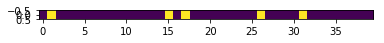

In [197]:
plt.imshow(input_image[0,0,:,:], cmap = 'gray')
plt.imshow(input_image[0,0,:,:])

In [202]:
output_image = np.array(output_fn([input_image]))
output_image.shape

(1, 1, 26, 1, 32)

In [205]:
output_image = np.rollaxis(np.rollaxis(output_image, 3, 1), 3, 1)
output_image.shape

(1, 1, 1, 26, 32)

In [223]:
a = output_image.reshape(1, 1, 26, 32)

In [225]:
a.shape

(1, 1, 26, 32)

<module 'matplotlib.pyplot' from '/home/letitgo/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

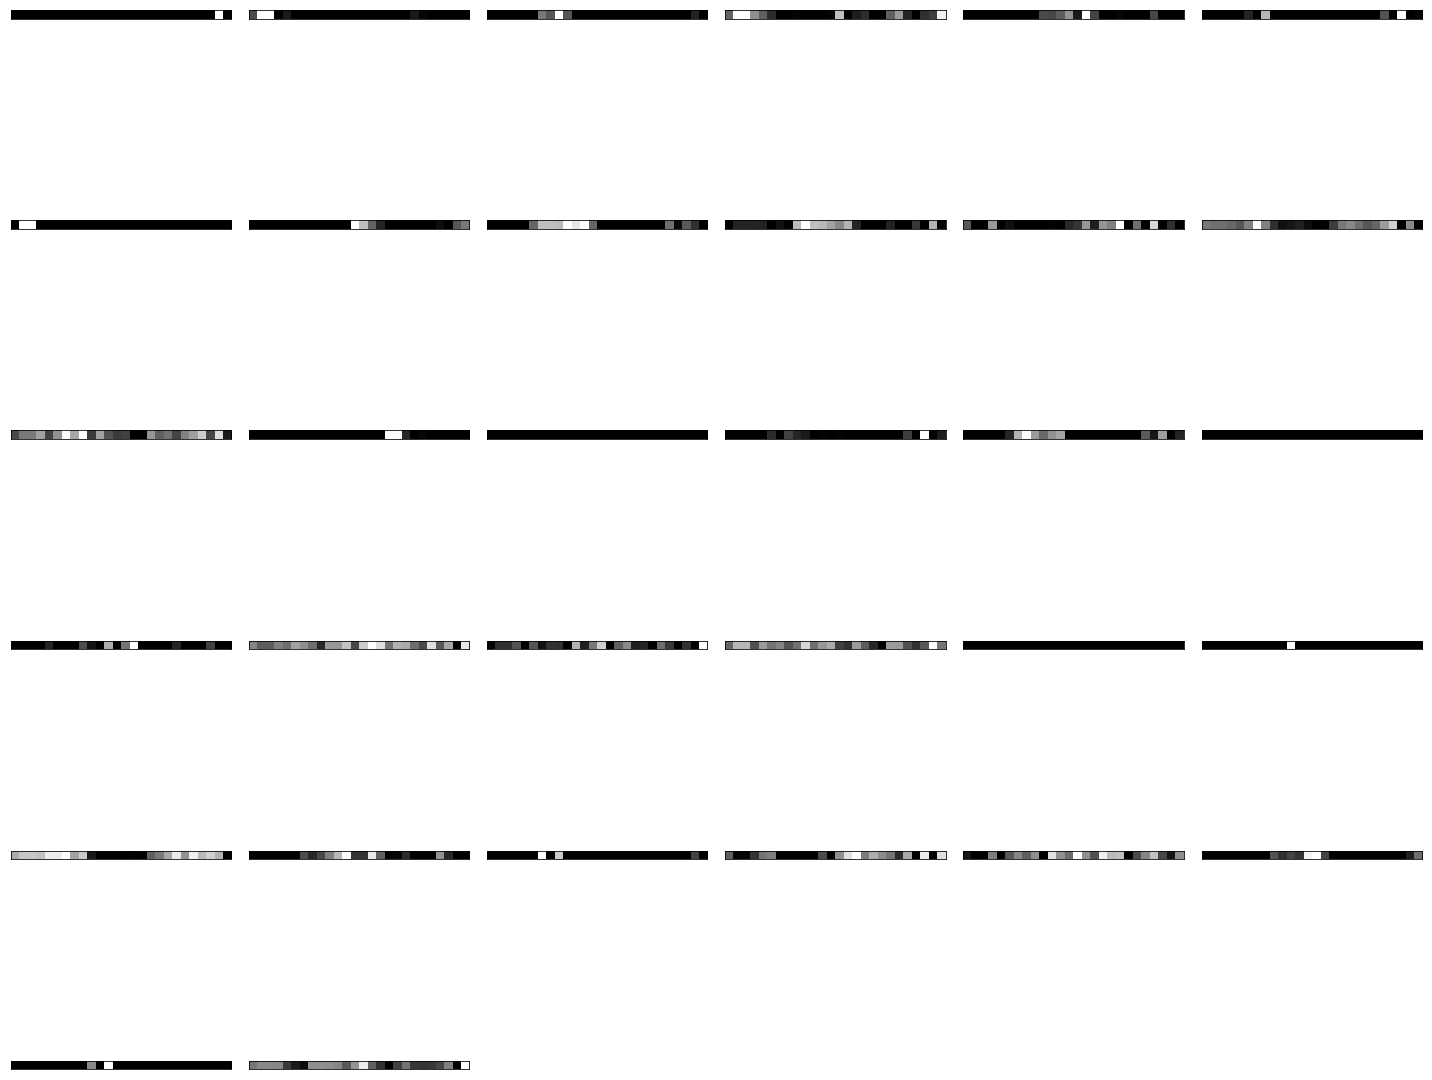

In [230]:
fig = plt.figure(figsize=(20,20))
for i in range(32):
    ax = fig.add_subplot(6, 6, i + 1)
    #ax.imshow(a[0,:,:,i], interpolation='nearest') # cmap=matplotlib.cm.gray
    ax.imshow(a[0,:,:,i], cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.tight_layout()
plt

In [ ]:
fig 

In [131]:
np.array(filters[0]).shape

(5, 1, 40, 32)

In [123]:
len(filters[0])

5

In [117]:
np.array(filters).shape

(2,)

(10, 1, 32, 64)
0
1
2
3
4
5
6
7
8
9


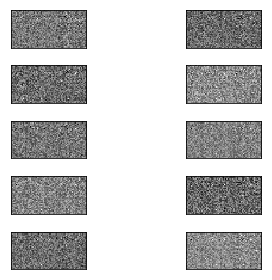

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


filters = model.layers[2].get_weights()[0]
print(np.array(filters).shape)
fig = plt.figure()
for j in range(len(filters)):
    print(j)
    ax = fig.add_subplot(5, 2, j+1)
    ax.matshow(filters[j][0], cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
plt.tight_layout()

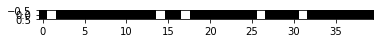

In [111]:
plt.imshow(input_image[2,28,:,:], cmap = 'gray')